# Project 5: Identifying High Risk Areas from NYC Traffic Conditions
## *Template Notebook*

In this notebook:

* [Topic 1](#topic-1)
* [Topic 2](#topic-2)

#### Import Libraries & Read in Data

In [109]:
## standard imports 
import pandas as pd 
import numpy as np
import re
## visualizations
import matplotlib.pyplot as plt
import seaborn as sns
## preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.dummy import DummyClassifier
## modeling
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import MultinomialNB
## trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor
## NLP
from sklearn.feature_extraction.text import CountVectorizer
## analysis
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, make_scorer, f1_score, mean_squared_error, mean_absolute_error

### statsmodels
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

import pmdarima as pmd
from pmdarima.utils import tsdisplay

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting.forecasting import plot_ys

## options
import sklearn
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100
pd.set_option('max_colwidth', 100)

In [22]:
### read in data
df = pd.read_csv('./data/crashes_per_day_2019-lincoln-tunnel.csv', index_col=0)

In [23]:
df.head()

,CRASHES
2019-01-01,5
2019-01-02,5
2019-01-03,4
2019-01-04,8
2019-01-05,1


In [4]:
df.shape

(363, 1)

## Topic 1 <a class="anchor" id="topic-1"></a>
<hr/>

Text(0.5, 1.0, 'Crashes per day 2019 - Lincoln Tunnel')

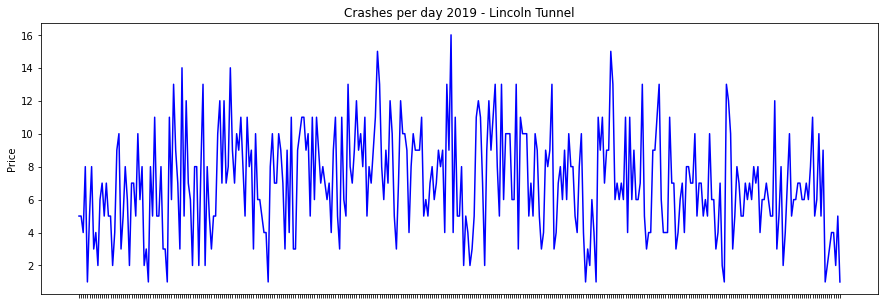

In [24]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['CRASHES'], c='blue')
# plt.plot(test.index, test['price'], c='red')
plt.tick_params(labelbottom=False)
plt.ylabel('Price')
plt.title('Crashes per day 2019 - Lincoln Tunnel')

### Add in Lag

In [40]:
# df18['lag_1'] = df18['CRASHES'].shift(1)
# df19['lag_1'] = df19['CRASHES'].shift(1)
# df18.head()

,CRASHES,lag_1
2018-01-01,435,NaN
2018-01-02,610,435.0
2018-01-03,619,610.0
2018-01-04,439,619.0
2018-01-05,676,439.0


In [9]:
# lag_features = {i: f'lag_{i}' for i in [1,7]}

In [10]:
# for i, feature_name in lag_features.items():
#     df[feature_name] = df['CRASHES'].shift(i)

In [11]:
# df.head(40)

,CRASHES,lag_1,lag_7,lag_30
2019-01-01,5,NaN,NaN,NaN
2019-01-02,5,5.0,NaN,NaN
2019-01-03,4,5.0,NaN,NaN
2019-01-04,8,4.0,NaN,NaN
2019-01-05,1,8.0,NaN,NaN
2019-01-06,5,1.0,NaN,NaN
2019-01-07,8,5.0,NaN,NaN
2019-01-08,3,8.0,5.0,NaN
2019-01-09,4,3.0,5.0,NaN
2019-01-10,2,4.0,4.0,NaN


In [12]:
# df.drop(columns=['lag_30'], inplace=True)

In [13]:
# df.head()

,CRASHES,lag_1,lag_7
2019-01-01,5,NaN,NaN
2019-01-02,5,5.0,NaN
2019-01-03,4,5.0,NaN
2019-01-04,8,4.0,NaN
2019-01-05,1,8.0,NaN


In [14]:
### drop na columns for modeling
# df.dropna(inplace=True)

In [15]:
# df.head()

,CRASHES,lag_1,lag_7
2019-01-08,3,8.0,5.0
2019-01-09,4,3.0,5.0
2019-01-10,2,4.0,4.0
2019-01-11,6,2.0,8.0
2019-01-12,7,6.0,1.0


In [92]:
### Select data
train = df.loc['2019-01':'2019-09']
test = df.loc['2019-09':'2019-10']

In [93]:
### create dataframe for predictions for each model
df_preds = test.copy()

## Baseline Model <a class="anchor" id="topic-2"></a>
<hr/>

In [94]:
df['CRASHES'].mean()

7.038567493112947

In [95]:
### add predictions to dataframe
df_preds['baseline'] = train['CRASHES'].mean()

In [124]:
mae_mean = mean_absolute_error(test['CRASHES'], df_preds['baseline'])
mae_mean = np.round(mae_naive, 0)
mae_mean

3.0

In [125]:
scores = [dict(mean=mae_mean)]
scores

[{'mean': 3.0}]

## Linear Regression <a class="anchor" id="topic-2"></a>
<hr/>

In [29]:
### Set up test and train data
# X_train = df18.drop(columns=['lag_1'])
# y_train = df18['lag_1']
# X_test = df19.drop(columns=['lag_1'])
# y_test = df19['lag_1']

# X = df.drop(columns=['CRASHES'])
# y = df['CRASHES']


,CRASHES
2019-08-27,4
2019-08-28,8
2019-08-29,10
2019-08-30,4
2019-08-31,1


In [18]:
### using statsmodels like in time series lesson part 4
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CRASHES   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     6.558
Date:                Thu, 29 Oct 2020   Prob (F-statistic):            0.00160
Time:                        17:07:06   Log-Likelihood:                -899.32
No. Observations:                 356   AIC:                             1805.
Df Residuals:                     353   BIC:                             1816.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3220      0.528     10.080      0.000       4.284       6.360
lag_1          0.1610      0.053      3.045      0.002       0.057       0.265
lag_7          0.0859      0.053      1.618      0.107      -0.019       0.190
==============================================================================
Omnibus:                        8.610   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                7.231
Skew:                           0.268   Prob(JB):                       0.0269
Kurtosis:                       2.553   Cond. No.                         34.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

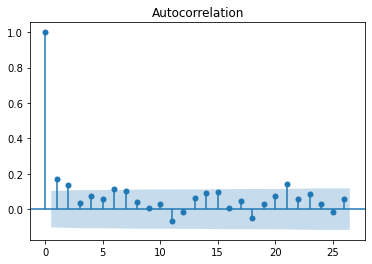

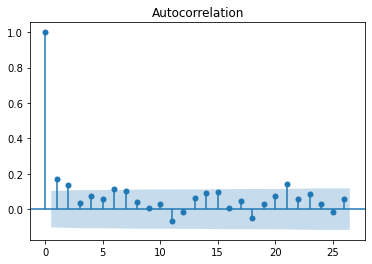

In [64]:
plot_acf(df['CRASHES'])

In [19]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [20]:
y_preds = lr.predict(X)

In [21]:
print('R2 Score: ', lr.score(X, y))

R2 Score:  0.035823838257678875


In [47]:
print('R2 Score: ', lr.score(X_test, y_test))

R2 Score:  0.08736782721948011


## SARIMA <a class="anchor" id="topic-2"></a>
<hr/>

/opt/anaconda3/lib/python3.8/site-packages/pmdarima/utils/visualization.py:219: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


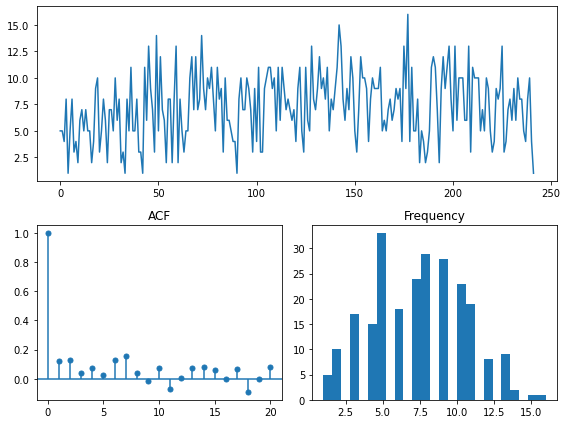

In [96]:
tsdisplay(train, lag_max=20);

In [57]:
model = pmd.auto_arima(train['CRASHES'], m=30, supress_warnings=True, trace=True)

Performing stepwise search to minimize aic


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,1)[30] intercept   : AIC=1241.894, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=1373.012, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=1305.892, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=1235.751, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=1371.016, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=1234.287, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=1235.765, Time=0.44 sec
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=1237.742, Time=0.93 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=1235.728, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[30] intercept   : AIC=1235.796, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=1304.068, Time=0.04 sec


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[30] intercept   : AIC=1238.019, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[30]             : AIC=1232.767, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[30]             : AIC=1234.286, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[30]             : AIC=1234.273, Time=0.25 sec
 ARIMA(0,1,1)(1,0,1)[30]             : AIC=1236.266, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[30]             : AIC=1234.272, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[30]             : AIC=1234.330, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[30]             : AIC=1302.075, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[30]             : AIC=1236.480, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[30]          
Total fit time: 6.447 seconds


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [58]:
# model = pmd.auto_arima(
#     train,start_p=7,
#     max_p=7,
#     start_q=5,
#     max_q=5,
#     start_d=1,
#     max_d=2,
#     start_P=4,
#     max_P=5,
#     start_Q=1,
#     max_Q=1,
#     start_D=0,
#     max_D=1,
#     m=20,
#     score='mse',
#     supress_warnings=True,
#     trace=True,
#     n_jobs=-1)

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -614.383
Date:                Thu, 29 Oct 2020   AIC                           1232.767
Time:                        18:14:00   BIC                           1239.736
Sample:                             0   HQIC                          1235.574
                                - 242                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9460      0.024    -39.628      0.000      -0.993      -0.899
sigma2         9.5009      1.016      9.350      0.000       7.509      11.492
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 3.61
Prob(Q):                              0.57   Prob(JB):                         0.16
Heteroskedasticity (H):               1.04   Skew:                             0.12
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
preds = model.predict(test.shape[0])

In [98]:
df_preds['SARIMA_auto'] = preds

In [99]:
df_preds.head()

,CRASHES,baseline,SARIMA_auto
2019-09-01,3,7.322314,6.962472
2019-09-02,2,7.322314,6.962472
2019-09-03,6,7.322314,6.962472
2019-09-04,4,7.322314,6.962472
2019-09-05,1,7.322314,6.962472


### Score the SARIMA model

In [126]:
mae_sar = np.round(mean_absolute_error(test['CRASHES'], df_preds['SARIMA_auto']),2)
scores.append(dict(simple_mean=mae_sar))
scores

[{'mean': 3.0}, {'simple_mean': 2.69}]

## Simple Exponential Smoothing
<hr/>

In [100]:
ses = SimpleExpSmoothing(train['CRASHES']).fit(smoothing_level=0.5)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [101]:
ses.summary()

Dep. Variable:,CRASHES,No. Observations:,242
Model:,SimpleExpSmoothing,SSE,2807.662
Optimized:,True,AIC,597.183
Trend:,None,BIC,604.161
Seasonal:,None,AICC,597.352
Seasonal Periods:,None,Date:,"Thu, 29 Oct 2020"
Box-Cox:,False,Time:,18:41:49
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,4.9493258,l.0,True


In [128]:
### make predictions
ses_forecast = ses.forecast(len(test))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [105]:
### add to results
df_preds['ses'] = ses_forecast.values

In [127]:
mae_ses = np.round(mean_absolute_error(test['CRASHES'], df_preds['ses']),2)
scores.append(dict(ses=mae_ses))
scores

[{'mean': 3.0}, {'simple_mean': 2.69}, {'ses': 4.13}]

### Plot Model Results for Comparison

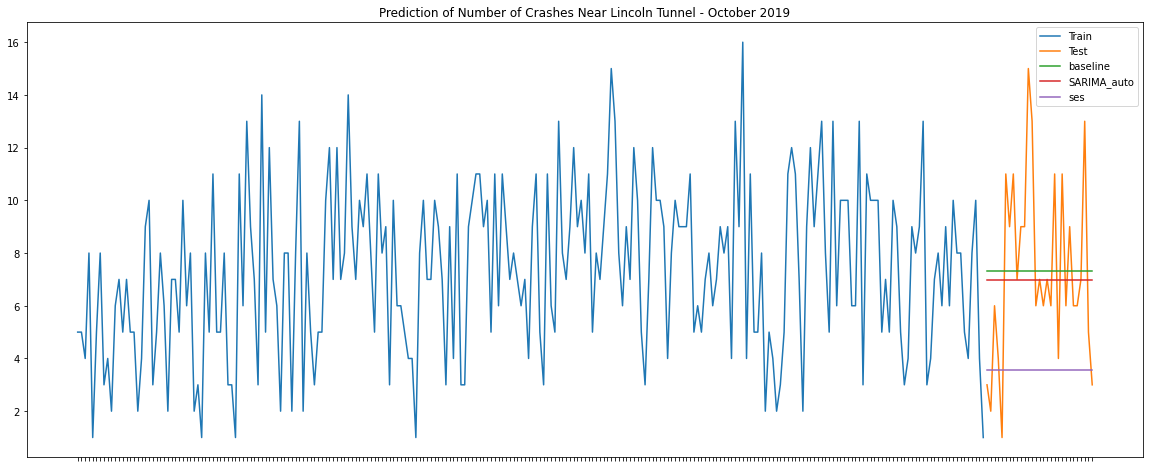

In [108]:
plt.figure(figsize=(20,8))
plt.plot(train['CRASHES'], label='Train')
plt.plot(test['CRASHES'], label='Test')
plt.plot(df_preds['baseline'], label='baseline')
plt.plot(df_preds['SARIMA_auto'], label='SARIMA_auto')
plt.plot(df_preds['ses'], label='ses')
plt.tick_params(labelbottom=False)
plt.title('Prediction of Number of Crashes Near Lincoln Tunnel - October 2019')
plt.legend(loc='best')
plt.savefig('./images/model-results.png',bbox_inches='tight');